In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
man_df = pd.read_csv('rollingsales_manhattan.csv')
man_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",5/20/13
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",5/16/13
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",5/23/13
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",5/15/13
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",5/13/13


In [3]:
man_df['SALE PRICE'] = man_df['SALE PRICE'].str.replace('$','').str.replace(',',"")
man_df['SALE PRICE'] = man_df['SALE PRICE'].astype('int64')
man_df['LAND SQUARE FEET'] = man_df['LAND SQUARE FEET'].str.replace(',','')
man_df['LAND SQUARE FEET'] = man_df['LAND SQUARE FEET'].astype('int64')
man_df['GROSS SQUARE FEET'] = man_df['GROSS SQUARE FEET'].str.replace(',','')
man_df['GROSS SQUARE FEET'] = man_df['GROSS SQUARE FEET'].astype('int64')

man_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,5/20/13
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,5/16/13
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,5/23/13
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1374637,5/15/13
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1649565,5/13/13


Text(0, 0.5, '# Properties')

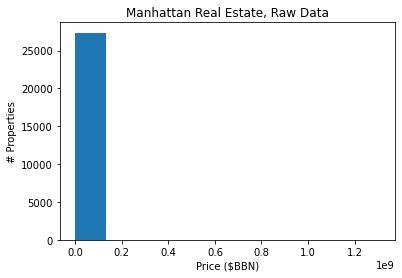

In [4]:
hist = plt.hist(man_df['SALE PRICE'])
plt.title('Manhattan Real Estate, Raw Data')
plt.xlabel('Price ($BBN)')
plt.ylabel('# Properties')

Text(0.5, 0, 'Price ($BBN)')

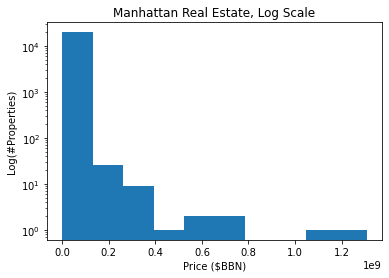

In [5]:
man_df = man_df.loc[~(man_df['SALE PRICE'] == 0)]

log_hist = plt.hist(man_df['SALE PRICE'], log = True)
plt.title('Manhattan Real Estate, Log Scale')
plt.ylabel('Log(#Properties)')
plt.xlabel('Price ($BBN)')

Text(0, 0.5, 'Price ($BBN)')

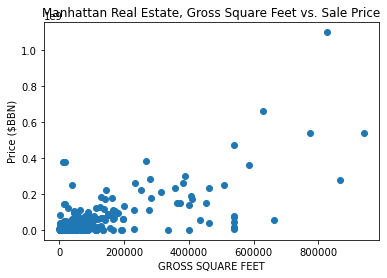

In [6]:
man_df = man_df.loc[~(man_df['GROSS SQUARE FEET'] == 0)]

scatter = plt.scatter(man_df['GROSS SQUARE FEET'], man_df['SALE PRICE'])
plt.title('Manhattan Real Estate, Gross Square Feet vs. Sale Price')
plt.xlabel('GROSS SQUARE FEET')
plt.ylabel('Price ($BBN)')


Text(0, 0.5, 'PRICE ($10MM)')

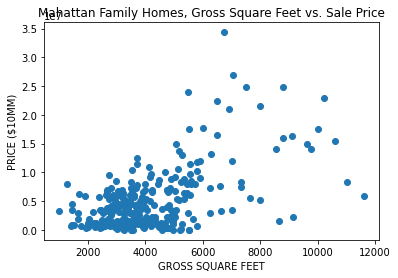

In [7]:
family_homes = man_df.loc[(man_df['BUILDING CLASS CATEGORY'].str.contains(pat ='Family', case = False))]

family_scatter = plt.scatter(family_homes['GROSS SQUARE FEET'], family_homes['SALE PRICE'])

plt.title('Mahattan Family Homes, Gross Square Feet vs. Sale Price')
plt.xlabel('GROSS SQUARE FEET')
plt.ylabel('PRICE ($10MM)')

In [8]:
family_homes.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,300.0,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,3.000000e+02
mean,1.0,1412.25000,57.440000,10032.706667,0.140000,1770.670000,4122.103333,1906.953333,1.0,4.886288e+06
std,0.0,550.93067,46.383883,35.900466,0.366307,1021.818954,1756.732310,19.258786,0.0,5.219030e+06
min,1.0,141.00000,1.000000,10001.000000,0.000000,673.000000,999.000000,1800.000000,1.0,1.000000e+01
25%,1.0,1006.00000,22.750000,10016.750000,0.000000,1470.250000,3036.000000,1899.000000,1.0,1.206193e+06
50%,1.0,1443.00000,46.000000,10026.500000,0.000000,1700.000000,3606.500000,1901.000000,1.0,3.440000e+06
75%,1.0,1908.75000,70.000000,10031.000000,0.000000,1951.750000,4884.750000,1910.000000,1.0,6.631250e+06
max,1.0,2238.00000,269.000000,10463.000000,2.000000,17164.000000,11610.000000,2010.000000,1.0,3.435000e+07
